# IMAGE CLASSIFICATION LIVE PROJECT
##  IMAGE CLASSIFICATION USING CNN

### Step:1 Importing the Libraries

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


    ### Step 2: Loading the Dataset

In [14]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Step 3: Data Exploration

In [18]:
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (60000, 28, 28)
Testing shape: (10000, 28, 28)


### Step 4: Visualize Sample Images

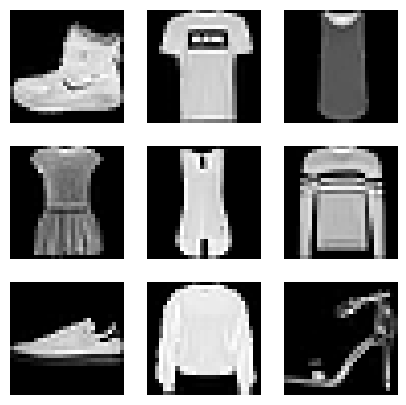

In [21]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()


### Step 5: Data Preprocessing

In [24]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [26]:
# Reshape for CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

## Model Building (CNN Architecture)

### Step 6: Building CNN Model

In [30]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


/Users/abdulraheem/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 7: Compiling  Model

In [33]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


##  Model Training

### Step 8: Train Model

In [37]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_split=0.2
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7665 - loss: 0.6563 - val_accuracy: 0.8577 - val_loss: 0.3876
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8801 - loss: 0.3299 - val_accuracy: 0.8862 - val_loss: 0.3078
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9027 - loss: 0.2683 - val_accuracy: 0.8983 - val_loss: 0.2785
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9154 - loss: 0.2341 - val_accuracy: 0.9080 - val_loss: 0.2523
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9241 - loss: 0.2039 - val_accuracy: 0.9110 - val_loss: 0.2473
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9364 - loss: 0.1755 - val_accuracy: 0.9105 - val_loss: 0.2454
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9412 - loss: 0.1557 - val_accuracy: 0.9145 - val_loss: 0.2468
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9497 - loss: 0

## Model Evaluation

### Step 9: Evaluate Model

In [41]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9118 - loss: 0.2895
Test Accuracy: 0.9103000164031982


## Prediction & Output

### Step 10: Predict Image

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


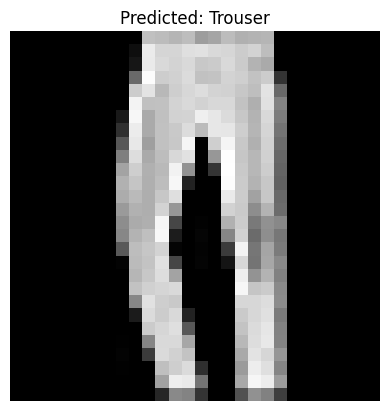

In [46]:
class_names = [
    'T-shirt/top','Trouser','Pullover','Dress','Coat',
    'Sandal','Shirt','Sneaker','Bag','Ankle boot'
]

predictions = model.predict(X_test)

index = 5
plt.imshow(X_test[index].reshape(28,28), cmap='gray')
plt.title("Predicted: " + class_names[np.argmax(predictions[index])])
plt.axis('off')
plt.show()


In [49]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

In [51]:
train_accuracy = history.history['accuracy'][-1]
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.9607916474342346


In [53]:
val_accuracy = history.history['val_accuracy'][-1]
print("Validation Accuracy:", val_accuracy)


Validation Accuracy: 0.9151666760444641


In [55]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9118 - loss: 0.2895
Test Accuracy: 0.9103000164031982


In [57]:
print("MODEL PERFORMANCE SUMMARY")
print(f"Training Accuracy   : {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy : {val_accuracy * 100:.2f}%")
print(f"Test Accuracy       : {test_accuracy * 100:.2f}%")


MODEL PERFORMANCE SUMMARY
Training Accuracy   : 96.08%
Validation Accuracy : 91.52%
Test Accuracy       : 91.03%
